# Students Do: Clustering costumers for e-commerce

Once you have prepared the data, it's time to start looking for patterns that could lead you to define customer clusters. After talking with the CFO of the company about the next quarter goals, you figured out that one way to understand customers, from the available data, is to cluster them according to their spending capacity, however you have to find how many groups you can define.

You decide to use your new unsupervised learning skills and put k-means in action!

In [12]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

## Instructions

Accomplish the following tasks and use K-Means to cluster the customers data.

 * Load the data

In [13]:
# Loading data
file_path = Path("../Resources/shopping_data_cleaned.csv")
df_shopping = pd.read_csv(file_path)
df_shopping.head()

,Age,Annual Income,Spending Score,Previous Shopper
0,-0.295240,-0.118424,-1.625204,1
1,-0.979855,0.051970,-0.053060,1
2,-0.009984,1.244733,0.208964,0
3,-0.181138,0.392760,-0.839132,1
4,-0.124086,1.074338,-0.577108,0


* Identify the best number of clusters using the elbow curve

In [14]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_shopping)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,646.080000
1,2,262.828303
2,3,206.916715
3,4,184.122053
4,5,165.517413


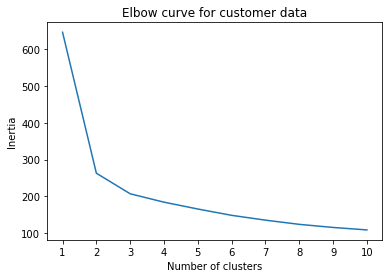

In [15]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

* Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

In [16]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

* Create a 2D-Scatter plot to analyze the clusters using `x="Annual Income"` and `y="Spending Score"`.

**Analyzing Clusters with the Best Value of `k`**

In [17]:
clusters = get_clusters(3, df_shopping)

In [18]:
clusters

,Age,Annual Income,Spending Score,Previous Shopper,class
0,-0.295240,-0.118424,-1.625204,1,0
1,-0.979855,0.051970,-0.053060,1,0
2,-0.009984,1.244733,0.208964,0,2
3,-0.181138,0.392760,-0.839132,1,0
4,-0.124086,1.074338,-0.577108,0,2
...,...,...,...,...,...
195,1.073990,-0.970398,1.126048,1,1
196,0.959887,-0.459214,1.912120,1,1
197,-0.295240,0.051970,0.470988,1,0
198,-0.124086,0.222365,0.208964,0,0


In [19]:
def show_clusters(df):
    plt.scatter(df['Annual Income'], df['Spending Score'], c=df['class'])
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()

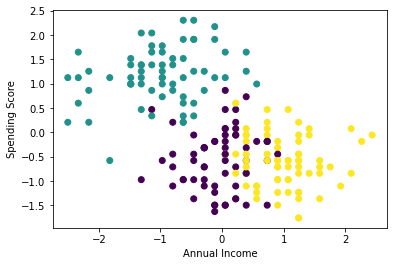

In [20]:
show_clusters(clusters)